In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
X_train = np.loadtxt('D:/indhu/Datasets/sample_cnn/input.csv', delimiter = ',')
Y_train = np.loadtxt('D:/indhu/Datasets/sample_cnn/labels.csv', delimiter = ',')

X_test = np.loadtxt('D:/indhu/Datasets/sample_cnn/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('D:/indhu/Datasets/sample_cnn/labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


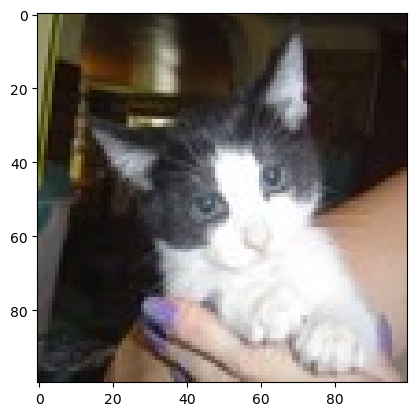

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(32, (3,3), activation = 'relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4980 - loss: 0.7338
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6115 - loss: 0.6559
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6883 - loss: 0.6137
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7428 - loss: 0.5308
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7738 - loss: 0.4909
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8040 - loss: 0.4310
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8539 - loss: 0.3501
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8977 - loss: 0.2704
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9351 - loss: 0.1877
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9606 - loss: 0.1449


In [17]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6930 - loss: 0.7924


[0.8549970984458923, 0.7024999856948853]

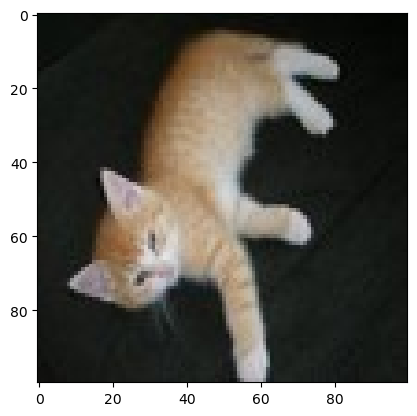

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Our model says it is a : dog


In [21]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)